In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.mixture import BayesianGaussianMixture
%matplotlib inline

In [185]:
df = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

__Gender__: Gender of the passengers (Female, Male)

__Customer Type__: The customer type (Loyal customer, disloyal customer)

__Age__: The actual age of the passengers

__Type of Travel__: Purpose of the flight of the passengers (Personal Travel, Business Travel)

__Class__: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

__Flight distance__: The flight distance of this journey

__Inflight wifi service__: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

__Departure/Arrival time convenient__: Satisfaction level of Departure/Arrival time convenient

__Ease of Online booking__: Satisfaction level of online booking

__Gate location__: Satisfaction level of Gate location

__Food and drink__: Satisfaction level of Food and drink

__Online boarding__: Satisfaction level of online boarding

__Seat comfort__: Satisfaction level of Seat comfort

__Inflight entertainment__: Satisfaction level of inflight entertainment

__On-board service__: Satisfaction level of On-board service

__Leg room service__: Satisfaction level of Leg room service

__Baggage handling__: Satisfaction level of baggage handling

__Check-in service__: Satisfaction level of Check-in service

__Inflight service__: Satisfaction level of inflight service

__Cleanliness__: Satisfaction level of Cleanliness

__Departure Delay in Minutes__: Minutes delayed when departure

__Arrival Delay in Minutes__: Minutes delayed when Arrival

__Satisfaction__: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [3]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64


In [5]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [186]:
coltype = {}
df.columns = [col.lower().replace(' ', '_').replace('-', '') for col in df.columns]
df.columns = [col if col not in ['id', 'class'] else col+'_' for col in df.columns]
df_test.columns = df.columns
for col in df.columns:
    coltype[col] = 'cat'
for col in ['age', 'flight_distance',
            'departure_delay_in_minutes', 'arrival_delay_in_minutes']:
    coltype[col] = 'numeric'
coltype = {}
df.columns

Index(['id_', 'gender', 'customer_type', 'age', 'type_of_travel', 'class_',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

## Шаг 1

In [187]:
df.groupby('class_').flight_distance.agg(lambda x: x.mean())

class_
Business    1675.976925
Eco          743.439748
Eco Plus     747.125567
Name: flight_distance, dtype: float64

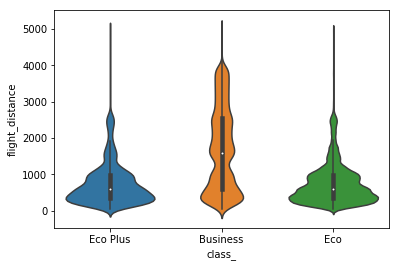

In [188]:
sns.violinplot(df.class_, df.flight_distance)

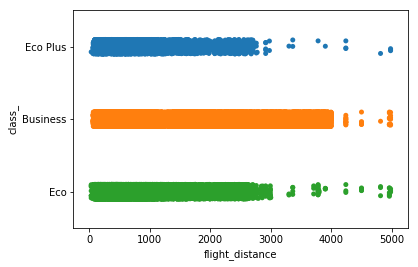

In [189]:
sns.stripplot(df.flight_distance, df.class_)

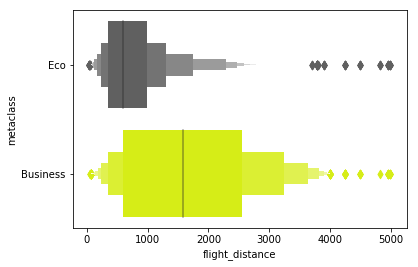

In [190]:
df['metaclass'] = df.class_.str.split(' ').apply(lambda x: x[0])
sns.boxenplot(x=df.flight_distance, y=df.metaclass,
            palette=['#606060FF', '#D6ED17FF'],
            saturation=2,
            linewidth=1.,
            )

## Шаг 2

bins: 8


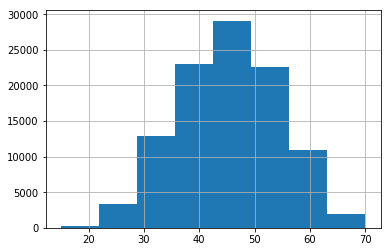

In [191]:
score_cols = ['inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness']
df['total_score'] = 0
for col in score_cols:
    df.total_score += df[col]
bins = int(1+np.sqrt(df.total_score.max() - df.total_score.min()))
print('bins:' , bins)
df.total_score.hist(bins=bins)

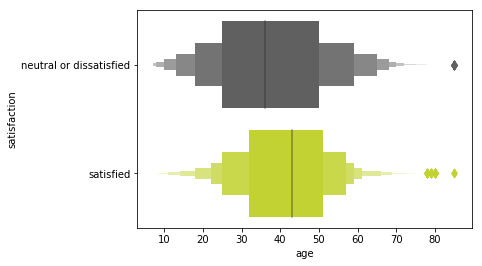

In [192]:
sns.boxenplot(df.age, df.satisfaction, palette=['#606060FF', '#D6ED17FF'])

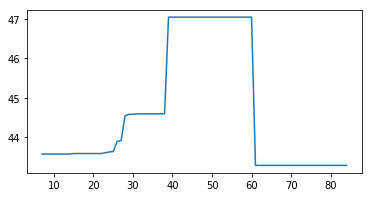

In [193]:
rf = RandomForestRegressor(max_depth=2, random_state=69).fit(df.age.values.reshape(-1, 1),
                                                         df.total_score)
fig, ax = plt.subplots(figsize=(6, 3))
ages = np.arange(df.age.min(), df.age.max())
ax.plot(ages, rf.predict(ages.reshape(-1, 1)))

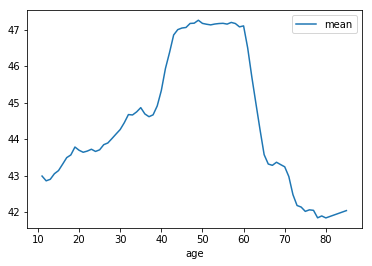

In [194]:
df.groupby('age').total_score.agg(['mean']).rolling(5).mean().plot()

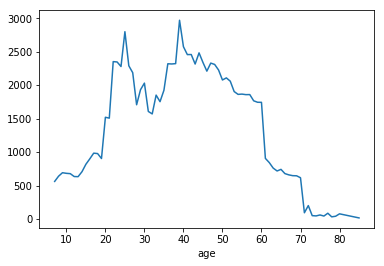

In [195]:
df.groupby('age').id_.agg('count').plot()

Text(70,50,'III.')

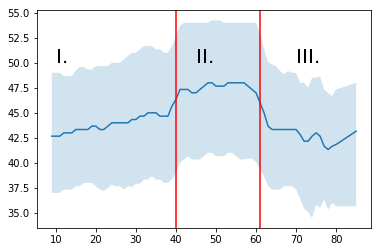

In [196]:
grouped = df.groupby('age').total_score
median = grouped.agg('median').rolling(3).mean().reset_index()
p25 = grouped.agg(lambda x: np.percentile(x, 25)).rolling(3).mean().reset_index()
p75 = grouped.agg(lambda x: np.percentile(x, 75)).rolling(3).mean().reset_index()

median.columns = ['age', 'v']
p25.columns = ['age', 'v']
p75.columns = ['age', 'v']

plt.plot(p25.age, median.v)
plt.fill_between(p25.age, p25.v,
                 p75.v,alpha=0.2)
plt.axvline(x=40, color='red')
plt.axvline(x=61, color='red')
plt.text(10, 50, 'I.', fontsize=20)
plt.text(45, 50, 'II.', fontsize=20)
plt.text(70, 50, 'III.', fontsize=20)

(40, 50)

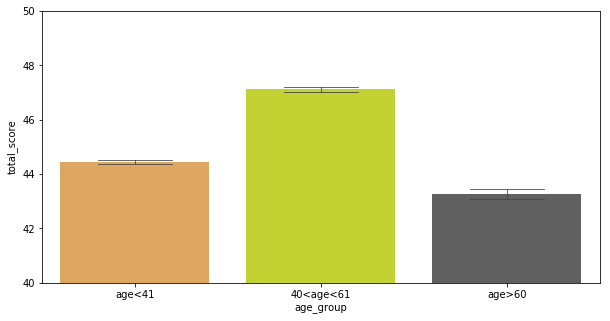

In [197]:
groups = ['age<41', '40<age<61', 'age>60']
df['age_group'] = groups[0]
df.loc[df.age>41, 'age_group'] = groups[1]
df.loc[df.age>60, 'age_group'] = groups[2]
plt.figure(figsize=(10, 5))
ax = sns.barplot(df.age_group, df.total_score, order=groups, ci=95,
                 capsize=0.4, errwidth=0.8,
                 palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])
ax.set_ylim(40, 50)

## Шаг 3

(51077, 52827)

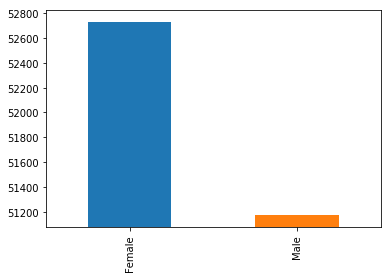

In [198]:
ax = df.gender.value_counts().plot(kind='bar')
ax.set_ylim(df.gender.value_counts().min()-100, df.gender.value_counts().max()+100)

(0.42, 0.45)

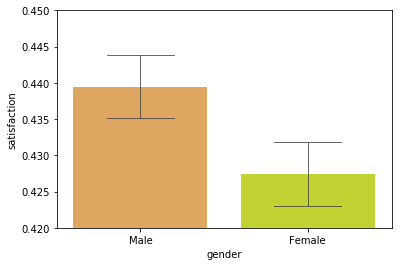

In [199]:
ax = sns.barplot(df.gender, df.satisfaction=='satisfied', ci=95,
                 capsize=0.4, errwidth=0.8,
                 palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])
ax.set_ylim(0.42, 0.45)

(0.485, 0.51)

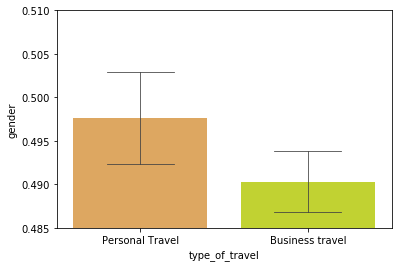

In [200]:
ax = sns.barplot(df.type_of_travel, df.gender=='Male', ci=95,
            capsize=0.4, errwidth=0.8,
            palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])
ax.set_ylim(0.485, 0.51)

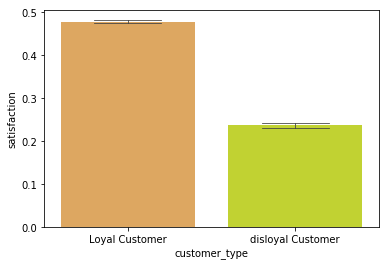

In [201]:
sns.barplot(df.customer_type, df.satisfaction=='satisfied', ci=95,
            capsize=0.4, errwidth=0.8,
            palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])

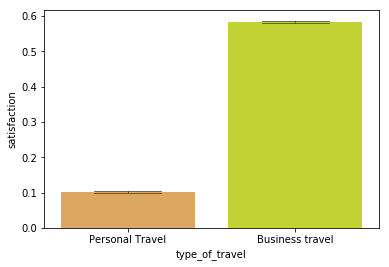

In [202]:
sns.barplot(df.type_of_travel, df.satisfaction=='satisfied', ci=95,
            capsize=0.4, errwidth=0.8,
            palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])

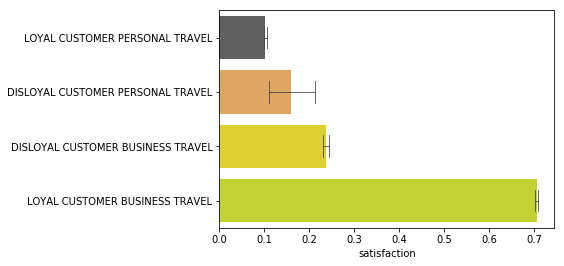

In [203]:
sns.barplot(df.satisfaction=='satisfied',
            (df.customer_type + ' ' + df.type_of_travel).str.upper(),
            ci=95,
            capsize=0.4, errwidth=0.8,
            order=['LOYAL CUSTOMER PERSONAL TRAVEL',
                   'DISLOYAL CUSTOMER PERSONAL TRAVEL',
                   'DISLOYAL CUSTOMER BUSINESS TRAVEL',
                   'LOYAL CUSTOMER BUSINESS TRAVEL'],
            palette=['#606060FF', '#F2AA4CFF', '#FEE715FF', '#D6ED17FF'])

## Шаг 4

In [25]:
preprocess = []
for col in df.columns[1:-4]:
    if col in ["age", "flight_distance",
               "departure_delay_in_minutes", "arrival_delay_in_minutes"]:
        continue
    if df[col].dtype=='O':
        print(col)
        preprocess.append(pd.get_dummies(df[col], drop_first=True).values)
    else:
        
        try:
            int(df[col].values.reshape(-1, 1).min())
        except ValueError:
            df[col] = df[col].fillna(0)
            print(col)
        preprocess.append(pd.get_dummies(df[col], drop_first=True).values)
        #preprocess.append(df[col].values.reshape(-1, 1))
preprocess = np.hstack(preprocess)

gender
customer_type
type_of_travel
class_


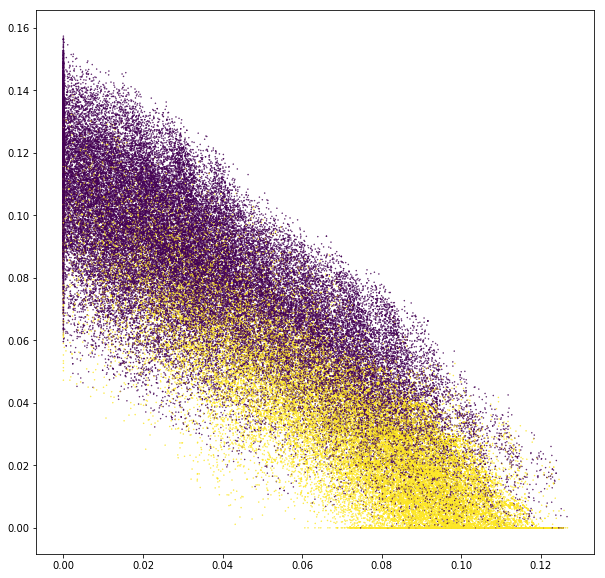

In [33]:
from sklearn.decomposition import NMF
plt.figure(figsize=(10, 10))
nmf_values = NMF(random_state=69, n_components=2).fit_transform(preprocess)
plt.scatter(nmf_values[:, 0], nmf_values[:, 1], s=0.2, c=(df.satisfaction=='satisfied'))

In [ ]:
umap = UMAP(n_components=2, random_state=69,
            force_approximation_algorithm=True,
            verbose=True,
            metric='cosine',
            low_memory=True).fit(preprocess)
umap_values = umap.transform(preprocess)

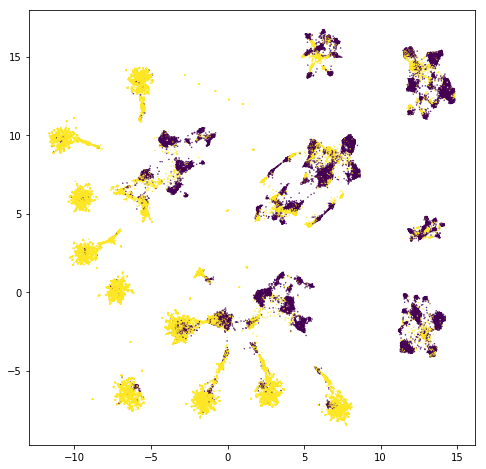

In [55]:
plt.figure(figsize=(8, 8))
plt.scatter(umap_values[:, 0], umap_values[:, 1], s=0.2, c=(df.satisfaction=='satisfied'))

In [ ]:
bgmm = BayesianGaussianMixture(n_components=16,
                               random_state=69,
                               warm_start=True,
                               verbose=True).fit(preprocess)


In [159]:
#clusters = bgmm.predict(preprocess)
from ipywidgets import interact
from functools import lru_cache
print(np.unique(clusters).shape)


#@lru_cache()
def p(n=0):
    plt.figure(figsize=(8, 8))
    pc = plt.scatter(umap_values[::10, 0], umap_values[::10, 1],
                s=0.5, c=(clusters==n)[::10])

interact(p, n=(0, 16))


(16,)


interactive(children=(IntSlider(value=0, description='n', max=16), Output()), _dom_classes=('widget-interact',…

<function __main__.p(n=0)>

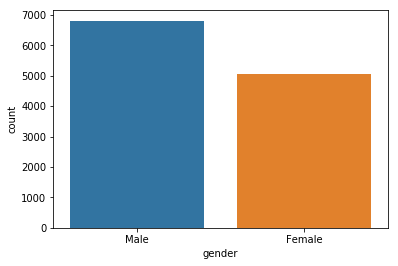

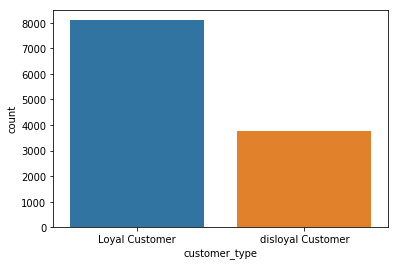

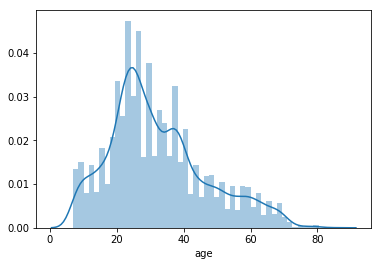

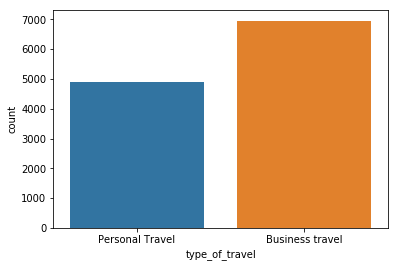

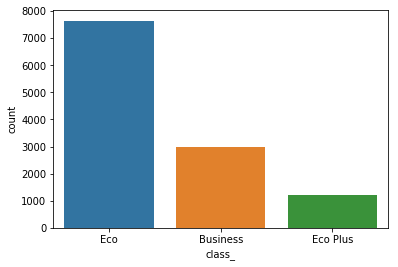

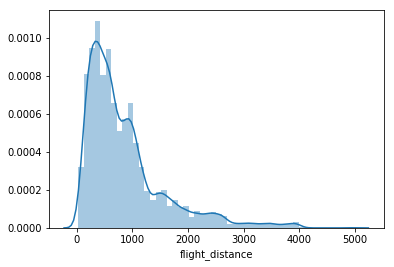

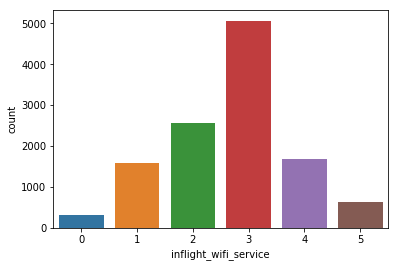

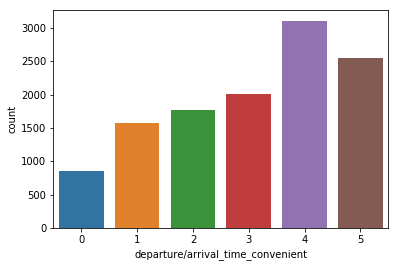

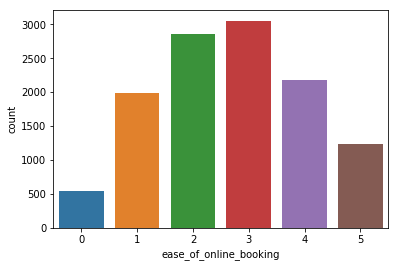

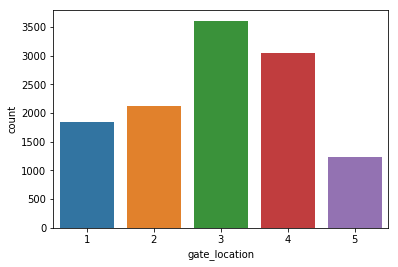

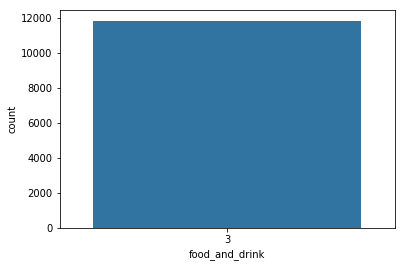

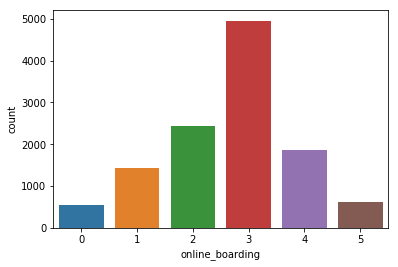

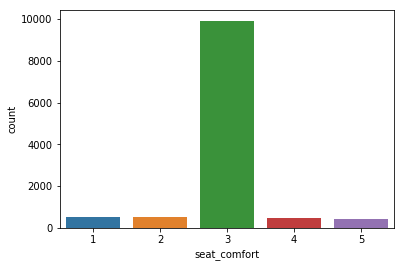

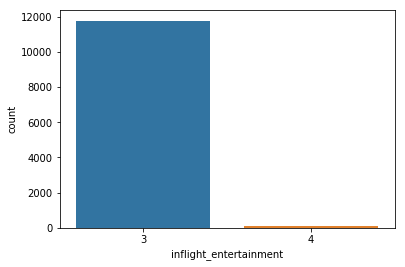

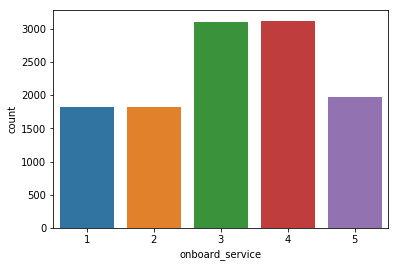

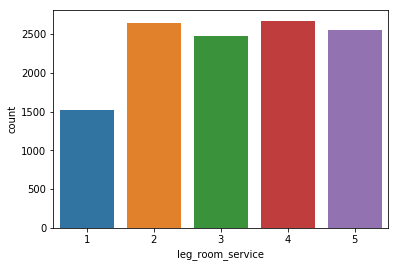

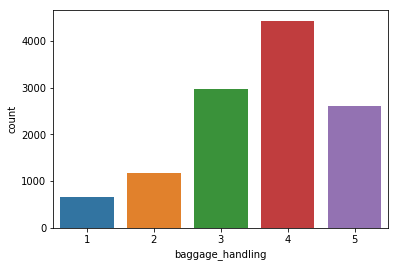

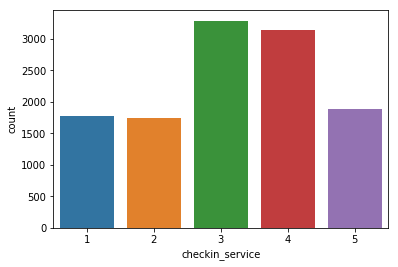

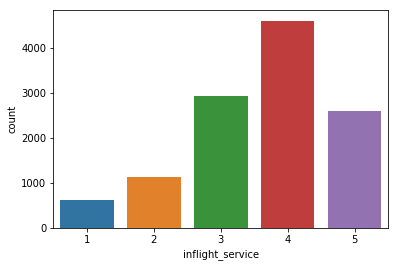

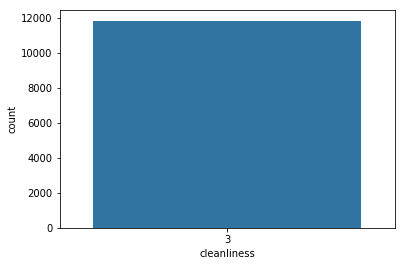

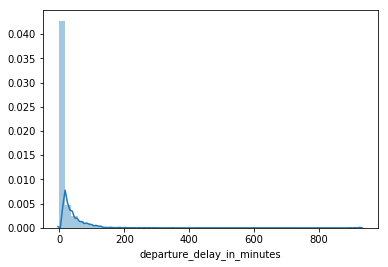

In [182]:
mask = clusters==11
for col in df.columns[1:-5]:
    if df[col].dtype!='O':
        if df[col].unique().size>7:
            sns.distplot(df.loc[mask, col])
            plt.show()
            continue
    sns.countplot(df.loc[mask, col])
    plt.show()

## Шаг 5

In [227]:
df['tt'] = 0
df_test['tt'] = 1
subset = ['gender', 'customer_type', 'age', 'type_of_travel', 'class_',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'tt']
ddf = pd.concat([df_test[subset], df[subset]])
preprocess = []
for col in ddf.columns[:-1]:
    if ddf[col].dtype=='O':
        print(col)
        preprocess.append(pd.get_dummies(ddf[col], drop_first=True).values)
    else:
        try:
            int(ddf[col].values.reshape(-1, 1).min())
        except ValueError:
            ddf[col] = ddf[col].fillna(-1)
            print(col)
        #preprocess.append(pd.get_dummies(ddf[col], drop_first=True).values)
        preprocess.append(ddf[col].values.reshape(-1, 1))
preprocess = np.hstack(preprocess)

gender
customer_type
type_of_travel
class_
arrival_delay_in_minutes


In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocess,
                                                    ddf[subset[-1]],
                                                    stratify=ddf[subset[-1]].tolist(),
                                                    random_state=69)
rf = RandomForestClassifier(random_state=69, verbose=True).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.498444158588881


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


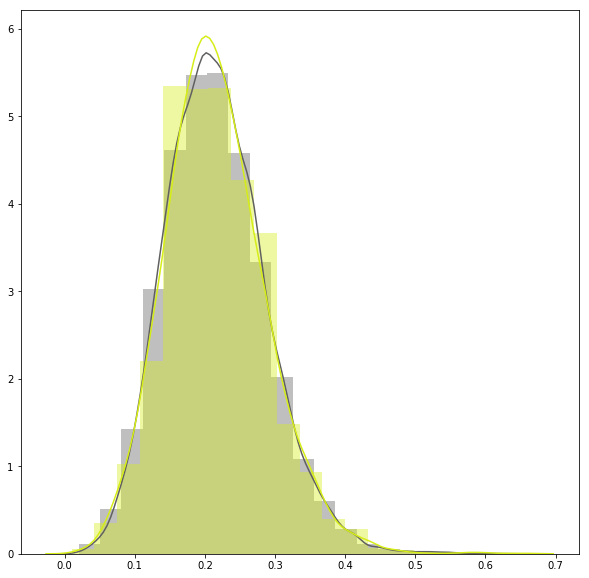

In [245]:
preds = rf.predict_proba(X_test)[:, 1]
print('AUC is ', roc_auc_score(y_test, preds))
plt.figure(figsize=(10, 10))
sns.distplot(preds[y_test==0], bins=20, color='#606060FF')
sns.distplot(preds[y_test==1], bins=20, color='#D6ED17FF')